<a href="https://colab.research.google.com/github/marcelodepaoli/Controle/blob/main/9_Interpretando_o_Lugar_Geom%C3%A9trico_das_Ra%C3%ADzes%2C_LGR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 5.0 MB/s eta 0:00:00


In [2]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

G(s) =  
s^2 - 3 s + 2
-------------
s^2 + 4 s + 8

K máximo de estabilidade =  1.3333333333333333


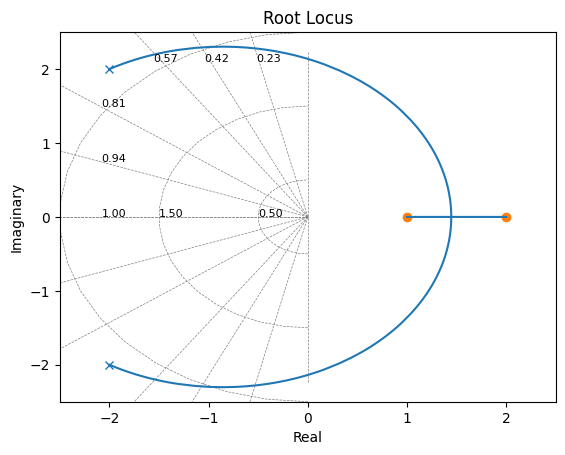

In [10]:
# Função de transferência em maha aberta
s = ctl.TransferFunction.s
G_s = (s-1)*(s-2)/(s**2+4*s+8)
print('G(s) = ', G_s)

# Lugar Geométrico das Raízes (LGR)
plt.figure(1)
ctl.root_locus(G_s, print_gain=True)
plt.ylim([-2.5,2.5])
plt.xlim([-2.5,2.5])

# Máximo K para estabilidade
out_st_margn = ctl.stability_margins(G_s)
Gain_margin = out_st_margn[0]
print('K máximo de estabilidade = ', Gain_margin)

In [5]:
# Tempo de simulação
Tsim = 10
quais_T = np.linspace(-1,Tsim,1000)

In [6]:
# Calcula um degrau unitário
degrau = np.ones_like(quais_T)
degrau[quais_T<0] = 0

K = 0.67  , P = [-0.6+2.28910463j -0.6-2.28910463j]
K = 1.33  , P = [-0.+2.13808994j  0.-2.13808994j]
K = 1.47  , P = [0.08108108+2.1037724j 0.08108108-2.1037724j]
K = 1.73  , P = [0.2195122+2.0364028j 0.2195122-2.0364028j]


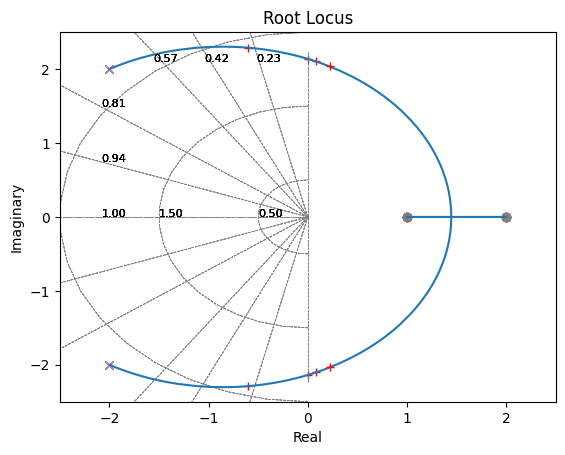

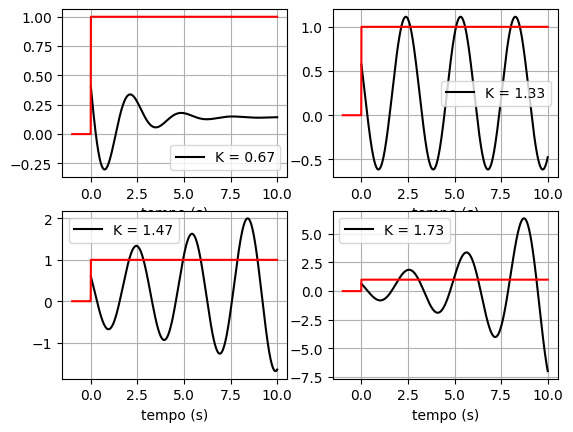

In [18]:
# Calcula os polos e a resposta para 4 valores de K
quais_K = Gain_margin*np.array([0.5, 1, 1.1, 1.3])
for qK in range(0, len(quais_K)):
  C_s = quais_K[qK]
  # Função transferência em malha fechada
  G1_s = ctl.feedback(ctl.series(C_s, G_s), 1, sign=-1)

  # Refaz a figura 1 para marcar os polos
  plt.figure(1)
  ctl.root_locus(G_s, print_gain=True)
  plt.ylim([-2.5,2.5])
  plt.xlim([-2.5,2.5])
  plt.plot(np.real(ctl.pole(G1_s)), np.imag(ctl.pole(G1_s)), 'r+')

  T_mf, yout_mf = ctl.step_response(G1_s, quais_T[quais_T>0])

  # Plota as 4 respostas ao degrau
  plt.figure(2)
  plt.subplot(2, 2, qK+1)
  plt.plot(T_mf, yout_mf, 'k-')
  plt.plot(quais_T, degrau, 'r-')
  plt.xlabel('tempo (s)')
  print('K = '+str(round(quais_K[qK],2)), ' , P = '+str(ctl.pole(G1_s)))
  plt.legend(['K = '+str(round(quais_K[qK],2))])
  plt.grid()

